In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
#csv summarizing parameters of TOIs derived from ariadne + TICv8
data = pd.read_csv('TOI_InitialResults.csv')

Radius:

In [24]:
#ariadne radii
ariadne_rad_initial = data['ARIADNE_Radius'] #includes nans where stars were skipped
ariadne_rad = np.nan_to_num(ariadne_rad_initial) #makes nans zero
ariadne_rad_err_up = data['ARIADNE_rad_upper']
ariadne_rad_err_low = data['ARIADNE_rad_lower']

#published radii from TIC
tic_rad = data['TICv8_Radius']
tic_rad_err = data['TICv8_Radius_err']

Teff:

In [25]:
#ariadne teff
ariadne_teff_initial = data['ARIADNE_Teff']
ariadne_teff = np.nan_to_num(ariadne_teff_initial) #in case some stars haven't been run/have been skipped
ariadne_teff_upper = data['ARIADNE_teff_upper']
ariadne_teff_lower = data['ARIADNE_teff_lower']

#published teff from TIC
pub_teff = data['TICv8_Teff']
pub_teff_err = data['TICv8_Teff_err']

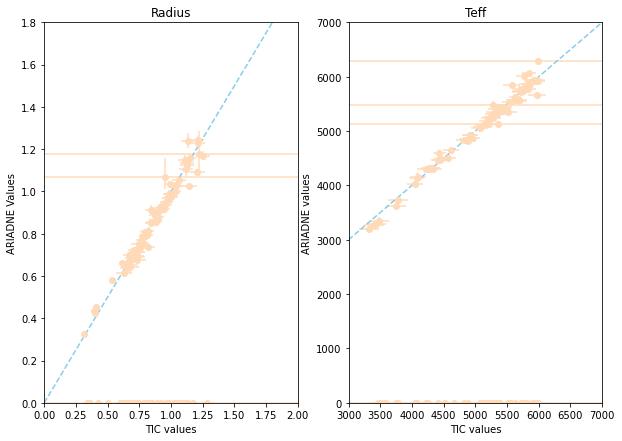

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))

#radius (for 73 out of 115 TOIs)
ax1.plot([0,2],[0,2],'--',color='skyblue')
ax1.errorbar(tic_rad, ariadne_rad, yerr=[ariadne_rad_err_up,ariadne_rad_err_low], xerr=tic_rad_err, fmt='o',color='peachpuff')
ax1.set_title('Radius')
ax1.set(ylabel='ARIADNE Values', xlabel='TIC values')
ax1.set(xlim=[0,2],ylim=[0,1.8])

#teff
ax2.plot([3000,7000],[3000,7000],'--',color='skyblue')
ax2.errorbar(pub_teff, ariadne_teff, yerr=[ariadne_teff_upper,ariadne_teff_lower], xerr=pub_teff_err, fmt='o',color='peachpuff')
ax2.set(ylabel='ARIADNE values', xlabel= 'TIC values')
ax2.set_title('Teff')
ax2.set(xlim=[3000,7000],ylim=[0,7000])

plt.show()

In [27]:
#ratio of ariadne & tic uncertainties vs tic radius
ariadne_avg_rad_err = (ariadne_rad_err_up + ariadne_rad_err_low)/2 #average of upper/lower ariadne uncertainties

ratio_rad_err = tic_rad_err / ariadne_avg_rad_err
ratio_rad_err_nonan = np.nan_to_num(ratio_rad_err)

In [28]:
#ratio of ariadne & tic uncertainties vs tic teff
ariadne_avg_teff_err = (ariadne_teff_upper + ariadne_teff_lower)/2

ratio_teff_err = pub_teff_err / ariadne_avg_teff_err
ratio_teff_err_nonan = np.nan_to_num(ratio_teff_err)

In [29]:
#ariadne logg
ariadne_logg_initial = data['ARIADNE_Logg']
ariadne_logg = np.nan_to_num(ariadne_teff_initial) #in case some stars haven't been run/have been skipped
ariadne_logg_upper = data['ARIADNE_logg_upper']
ariadne_logg_lower = data['ARIADNE_logg_lower']

#published logg from TIC
pub_logg = data['TICv8_Logg']
pub_logg_err = data['TICv8_Logg_err']

#ratio of uncertainties
ariadne_avg_logg_err = (ariadne_logg_upper + ariadne_logg_lower)/2

ratio_logg_err = pub_logg_err / ariadne_avg_logg_err
ratio_logg_err_nonan = np.nan_to_num(ratio_logg_err)

In [30]:
#ariadne metallicity
ariadne_feh_initial = data['ARIADNE_[Fe/H]']
ariadne_feh = np.nan_to_num(ariadne_feh_initial) #in case some stars haven't been run/have been skipped
ariadne_feh_upper = data['ARIADNE_feh_upper']
ariadne_feh_lower = data['ARIADNE_feh_lower']

#published metallicity from TIC
pub_feh = data['TICv8_[M/H]']
pub_feh_err = np.nan_to_num(data['TICv8_[M/H]_err'])

#ratio of uncertainties
ariadne_avg_feh_err = (ariadne_feh_upper + ariadne_feh_lower)/2

ratio_feh_err = pub_feh_err / ariadne_avg_feh_err
ratio_feh_err_nonan = np.nan_to_num(ratio_feh_err)

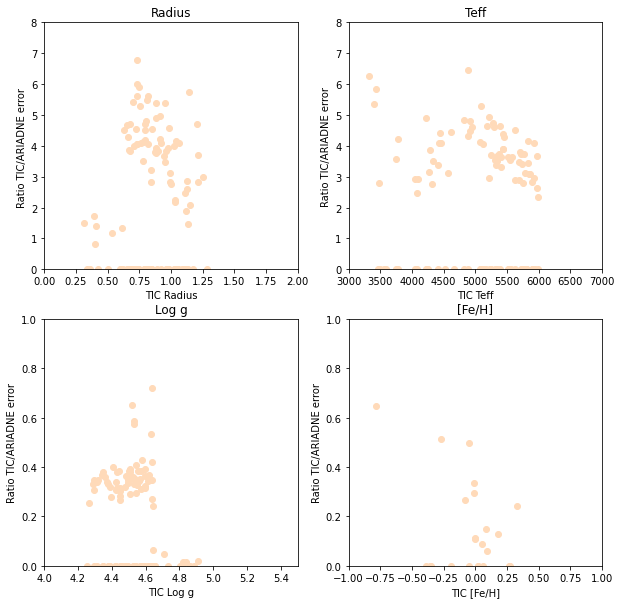

In [41]:
#ratio of errors vs tic values
fig, axs = plt.subplots(2,2, figsize=(10,10))

#radius
axs[0,0].plot(tic_rad, ratio_rad_err_nonan,'o',color='peachpuff')
axs[0,0].set_title('Radius')
axs[0,0].set(ylabel='Ratio TIC/ARIADNE error ', xlabel='TIC Radius')
axs[0,0].set(xlim=[0,2],ylim=[0,8])

#teff
axs[0,1].plot(pub_teff, ratio_teff_err_nonan,'o',color='peachpuff')
axs[0,1].set(ylabel='Ratio TIC/ARIADNE error', xlabel= 'TIC Teff')
axs[0,1].set_title('Teff')
axs[0,1].set(xlim=[3000,7000],ylim=[0,8])

#logg
axs[1,0].plot(pub_logg, ratio_logg_err_nonan,'o',color='peachpuff')
axs[1,0].set(ylabel='Ratio TIC/ARIADNE error', xlabel= 'TIC Log g')
axs[1,0].set_title('Log g')
axs[1,0].set(xlim=[4,5.5],ylim=[0,1])

#metallicity
axs[1,1].plot(pub_feh, ratio_feh_err_nonan,'o',color='peachpuff')
axs[1,1].set(ylabel='Ratio TIC/ARIADNE error', xlabel= 'TIC [Fe/H]')
axs[1,1].set_title('[Fe/H]')
axs[1,1].set(xlim=[-1,1],ylim=[0,1])

plt.show()